# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# create lists to hold lat_lngs and cities information
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeather Key
api_key = weather_api_key
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="

# define count of pass throughs
record_num = 0
set_num = 1

print(query_url+city)

http://api.openweathermap.org/data/2.5/weather?appid=5c9ddcecaab7c65c8929f51416d9937c&units=imperial&q=ormara


In [4]:

city_name = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

record_num = 0
set_num = 1

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if record_num > 49:
            record_num = 1
            set_num += 1
            city_name.append(city)
        else:
            record_num += 1
            city_name.append(city)
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    except Exception:
        print("City not found. Skipping...")

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | taltal
Processing Record 3 of Set 1 | sao jose da coroa grande
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | pithapuram
Processing Record 7 of Set 1 | gat
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | cap-aux-meules
Processing Record 11 of Set 1 | cherskiy
City not found. Skipping...
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | dahra
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
City not found. Skipping...
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | brigantine
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | hithadhoo
Proces

Processing Record 36 of Set 4 | lavrentiya
Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | saskylakh
City not found. Skipping...
Processing Record 39 of Set 4 | hualmay
Processing Record 40 of Set 4 | tabou
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | eyl
Processing Record 43 of Set 4 | grindavik
City not found. Skipping...
Processing Record 44 of Set 4 | zhigansk
Processing Record 45 of Set 4 | atambua
Processing Record 46 of Set 4 | rudbar
Processing Record 47 of Set 4 | roald
Processing Record 48 of Set 4 | tual
Processing Record 49 of Set 4 | nioro
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | graaff-reinet
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | half moon bay
Processing Record 8 of Set 5 | belmonte
Processing Rec

Processing Record 28 of Set 8 | olafsvik
Processing Record 29 of Set 8 | sebastian
Processing Record 30 of Set 8 | iskateley
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 8 | varhaug
Processing Record 32 of Set 8 | eidfjord
Processing Record 33 of Set 8 | ewa beach
Processing Record 34 of Set 8 | roebourne
Processing Record 35 of Set 8 | ust-karsk
Processing Record 36 of Set 8 | usinsk
Processing Record 37 of Set 8 | qaqortoq
City not found. Skipping...
Processing Record 38 of Set 8 | xining
Processing Record 39 of Set 8 | orlik
City not found. Skipping...
Processing Record 40 of Set 8 | nishihara
Processing Record 41 of Set 8 | manama
Processing Record 42 of Set 8 | sabha
Processing Record 43 of Set 8 | airai
Processing Record 44 of Set 8 | jinka
Processing Record 45 of Set 8 | ellensburg
Processing Record 46 of Set 8 | padre paraiso
Processing Record 47 of Set 8 | juazeirinho
Processing Record 48 of Set 8 | grand gaube
Processing Record 49 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_list = {
    'City': city_name,
    'Lat': lats,
    'Lng': lngs,
    'Max Temp': max_temps,
    'Humidity': humidities,
    'Cloudiness': cloudinesses,
    'Wind Speed': wind_speeds,
    'Country': countries,
    'Date': dates
}
city_df = pd.DataFrame(weather_list)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.52,57.52,64.40,93,40,4.70,MU,1604285901
1,taltal,-25.40,-70.48,57.52,71,6,5.73,CL,1604285901
2,sao jose da coroa grande,20.51,76.21,72.84,51,0,4.38,IN,1604285902
3,bredasdorp,-34.53,20.04,64.40,82,98,13.87,ZA,1604285902
4,albany,42.60,-73.97,41.00,87,76,1.99,US,1604285902


In [12]:
# export the dataframe to a csv
city_df.to_csv("city_df.csv")

city_dataframe = pd.read_csv("city_df.csv")

city_dataframe = city_dataframe.drop(columns = ['Unnamed: 0'])

city_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.52,57.52,64.40,93,40,4.70,MU,1604285901
1,taltal,-25.40,-70.48,57.52,71,6,5.73,CL,1604285901
2,sao jose da coroa grande,20.51,76.21,72.84,51,0,4.38,IN,1604285902
3,bredasdorp,-34.53,20.04,64.40,82,98,13.87,ZA,1604285902
4,albany,42.60,-73.97,41.00,87,76,1.99,US,1604285902


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.
any(city_dataframe['Humidity'] >100)
city_dataframe['Humidity'].max()

100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

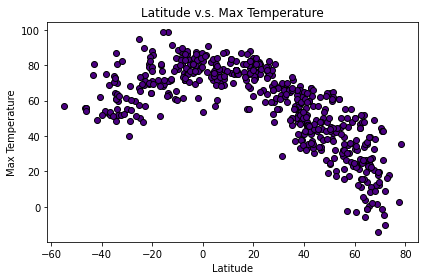

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(city_dataframe['Lat'], city_dataframe['Max Temp'], marker = 'o', color = 'indigo',
           edgecolor ='black')
plt.title('Latitude v.s. Max Temperature')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

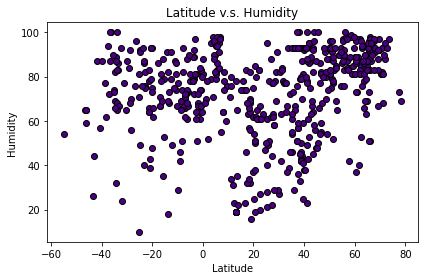

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(city_dataframe['Lat'], city_dataframe['Humidity'], marker = 'o', color = 'indigo',
           edgecolor ='black')
plt.title('Latitude v.s. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

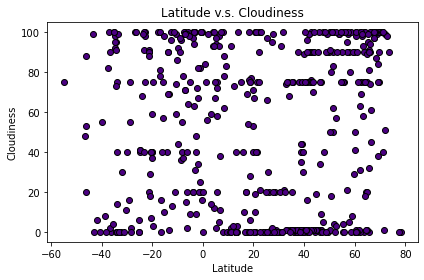

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(city_dataframe['Lat'], city_dataframe['Cloudiness'], marker = 'o', color = 'indigo',
           edgecolor ='black')
plt.title('Latitude v.s. Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

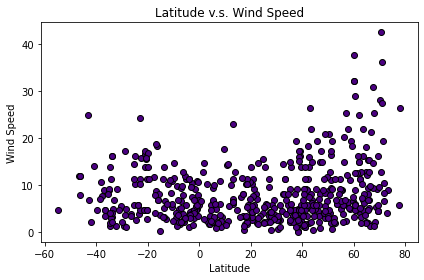

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(city_dataframe['Lat'], city_dataframe['Wind Speed'], marker = 'o', color = 'indigo',
           edgecolor ='black')
plt.title('Latitude v.s. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Wind Speed.png")

## Linear Regression

In [35]:
Lat_North

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,sao jose da coroa grande,20.51,76.21,72.84,51,0,4.38,IN,1604285902
4,albany,42.60,-73.97,41.00,87,76,1.99,US,1604285902
5,pithapuram,17.12,82.27,80.60,83,20,8.05,IN,1604285902
6,gat,31.61,34.76,69.01,78,100,2.53,IL,1604285882
7,lompoc,34.64,-120.46,64.99,72,1,5.82,US,1604285902
...,...,...,...,...,...,...,...,...,...
532,iroquois falls,40.75,-87.83,32.00,80,1,8.05,US,1604285958
534,seymchan,62.88,152.43,15.76,94,99,1.86,RU,1604285959
535,mikhaylovka,50.06,43.24,44.01,83,91,3.00,RU,1604285959
537,nome,64.50,-165.41,19.40,79,1,3.65,US,1604285959


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.85
The r-squared is: -0.8478678482676358
The equation of the regression line is: y = -0.98x + 90.17


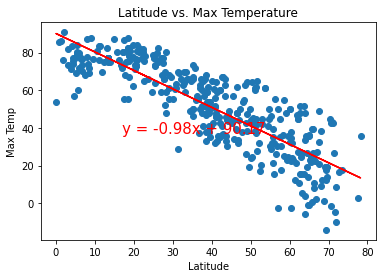

In [42]:
Lat_North = city_dataframe[city_dataframe['Lat']>= 0]
correlation = st.pearsonr(Lat_North['Lat'], Lat_North['Max Temp'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_North['Lat']
y_value = Lat_North['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.59
The r-squared is: 0.5922901496471259
The equation of the regression line is: y = 0.54x + 81.65


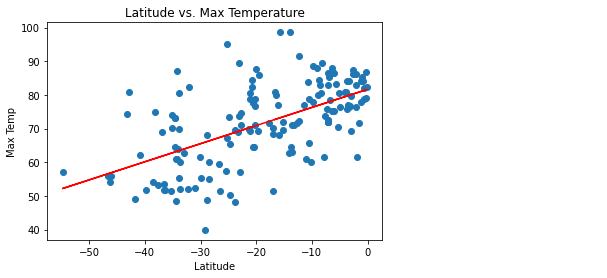

In [43]:
Lat_South = city_dataframe[city_dataframe['Lat']< 0]
correlation = st.pearsonr(Lat_South['Lat'], Lat_South['Max Temp'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_South['Lat']
y_value = Lat_South['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.38
The r-squared is: 0.3816641999145706
The equation of the regression line is: y = 0.42x + 55.32


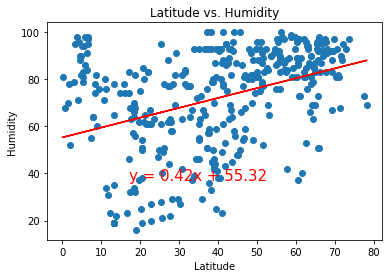

In [44]:
Lat_North = city_dataframe[city_dataframe['Lat']>= 0]
correlation = st.pearsonr(Lat_North['Lat'], Lat_North['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_North['Lat']
y_value = Lat_North['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.03
The r-squared is: 0.029992867177303265
The equation of the regression line is: y = 0.04x + 72.96


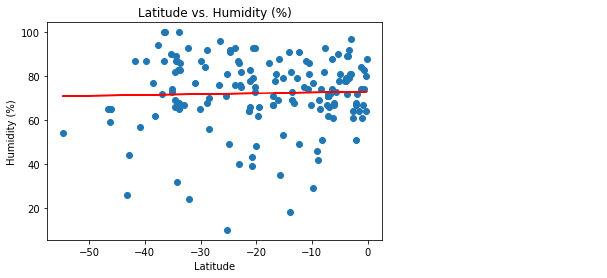

In [46]:
Lat_South = city_dataframe[city_dataframe['Lat']< 0]
correlation = st.pearsonr(Lat_South['Lat'], Lat_South['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_South['Lat']
y_value = Lat_South['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.24
The r-squared is: 0.24494631686343935
The equation of the regression line is: y = 0.52x + 26.47


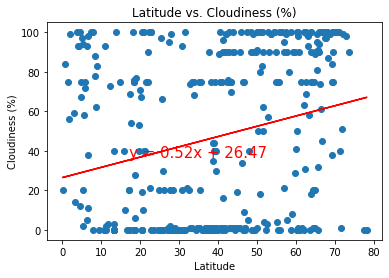

In [47]:
Lat_North = city_dataframe[city_dataframe['Lat']>= 0]
correlation = st.pearsonr(Lat_North['Lat'], Lat_North['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_North['Lat']
y_value = Lat_North['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.21
The r-squared is: 0.2076829789216378
The equation of the regression line is: y = 0.59x + 68.45


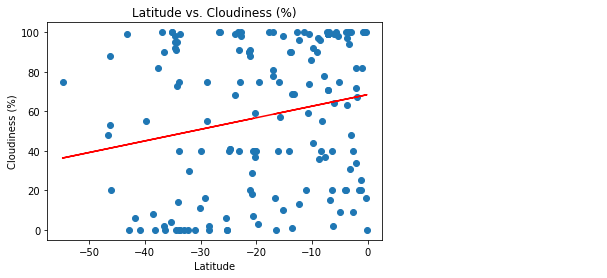

In [49]:
Lat_South = city_dataframe[city_dataframe['Lat']< 0]
correlation = st.pearsonr(Lat_South['Lat'], Lat_South['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_South['Lat']
y_value = Lat_South['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.31
The r-squared is: 0.31212848824524564
The equation of the regression line is: y = 0.1x + 3.88


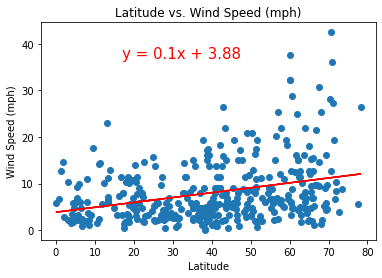

In [51]:
Lat_North = city_dataframe[city_dataframe['Lat']>= 0]
correlation = st.pearsonr(Lat_North['Lat'], Lat_North['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_North['Lat']
y_value = Lat_North['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.17
The r-squared is: -0.1689563194301004
The equation of the regression line is: y = -0.06x + 6.22


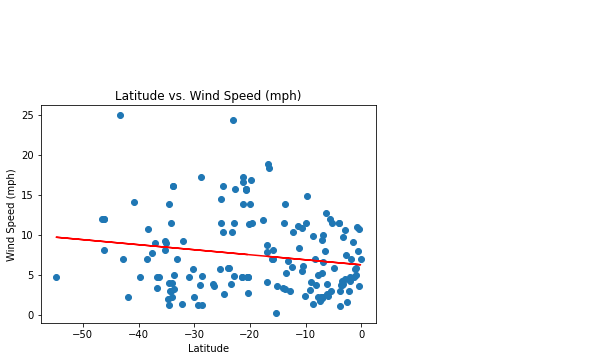

In [52]:
Lat_South = city_dataframe[city_dataframe['Lat']< 0]
correlation = st.pearsonr(Lat_South['Lat'], Lat_South['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_value = Lat_South['Lat']
y_value = Lat_South['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()